<a href="https://colab.research.google.com/github/justinballas/Articles/blob/main/TVM_Python_Final_Draft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Exploring the Time Value of Money in Python (Numpy Financial Tutorial and More)**

In business and finance school, you may hear that in order to stay competitive in the marketplace, it is important to learn things like R or Python. Naturally, the next steps are to scour the internet for tutorials. You may stumble upon many tutorials created by people with computer science backgrounds that dabble in finance. These may be tutorials on using machine learning to predict stock prices, or using time series analysis to study the trading patterns of cryptocurrency. These can be effective pursuits and are certainly worth their time, but it is not so common to find tutorials for these technologies by teachers with traditional finance backgrounds that focus on traditional finance concepts. Furthermore, it is even less common to find tutorials by people who are deeply educated in both fields.

This article will attempt to marry the traditional finance concepts with the efficiency of Python code, and offer a window into Python for students studying business and finance.


Now we will import Pandas and Numpy.

In [1]:
import numpy as np
import pandas as pd
import datetime as dt

Net Present Value is one of the first concepts you will learn in a traditional finance course. NPV gives you the value today of a stream of cash flows discounted by a specified rate of growth.

Net present value is the sum of the present value of a stream of cash flows. The present value formula is pv = cf/(1+r)**n

r being rate and n being the compounding period.

Let's calculate NPV with Python.

In [ ]:
#Initializing our stream of cash throws with a Python list.
cash_flow = [-100_000, 25000, 25000, 25000, 25000, 25000]

#Our discount rate is 7% per month.
r = .07/12

#Using list comprehension to loop over our stream of Cash Flows to calculate NPV for each CF.
pv = [cash_flow[i-1]/(1+r)**i for i in range(1, len(cash_flow)+1)]
print(pv)

[-99420.04971002485, 24710.865710859533, 24567.55497351403, 24425.075367205336, 24283.42207178658, 24142.590295065365]


In [ ]:
npv = sum(pv)
print(npv)

22709.458708406


Now if we want to create a cf table, we can use Pandas by creating a dataframe with the column defined as the equation.

In [5]:
cash_flow = [-100_000, 25000, 25000, 25000, 25000, 25000]

year = [i for i in range(len(cash_flow))]

#Creating a Pandas dataframe with year and cash flow columns
cf_table = pd.DataFrame({'Year': year, "cash_flow": cash_flow})
r = .07/12
#Creating the present value column
cf_table["PV"] = cf_table['cash_flow'] / (1+r)**cf_table['Year']
cf_table.set_index('Year')

,cash_flow,PV
Year,,
0,-100000,-100000.000000
1,25000,24855.012428
2,25000,24710.865711
3,25000,24567.554974
4,25000,24425.075367
5,25000,24283.422072


Now we can solve for the npv by using the sum function on the column.

In [7]:
#Calculating NPV as the sum of the PV column
npv = cf_table["PV"].sum()
print('The NPV for this project is: ${:,.2f}.'.format(np.round(npv,0)))

The NPV for this project is: $22,842.00.



One of the most widely used libraries in Python is Numpy. Numpy utilizes scientific computing to aid in data analysis, data science, and even scientific experiments. However, there is another library related to Numpy that focuses on traditional financial concepts. This library is called Numpy Financial.

First we must install the Numpy Financial package. To install packages in Jupyter notebooks or google colab, we must first type in an exclamation point in order to access the console, then type "pip install numpy_financial"

In [10]:
!pip install numpy_financial

In [11]:
import numpy_financial as npf

Now let's calculating NPV with Numpy Financial

In [ ]:
rate = .07/12

CFs = [-100_000, 25000, 25000, 25000, 25000, 25000]

npv = npf.npv(rate, CFs)

print('The NPV for this project is: ${:,.2f}.'.format(np.round(npv,0)))

The NPV for this project is: $22,842.00.


Utilizing packages like NPF makes it much easier to write code to perform these functions for you.

If you are used to doing TVM calculations in Excel, you may have noticed that our Python output is a little different than the Excel output.

When calculated in the same manner in Excel, our NPV will be $22,709. Is NPF wrong? Is Excel wrong? The answer to both of these questions is no.

They are both correct, however, they are both answers to different questions.

The difference lies in the way that Python and Excel use indexes. In python, the first value in a list is given the index 0, whereas in Excel, the first value in a range is given the index 1. Meaning that in Python, our first cashflow is given and exponent of t=0, and in Excel, the first cash flow is given the exponent of t=1. Effectively meaning that in python, our first value is the starting cash value, and in Excel, our starting cash value is zero, and the first cash flow is after the first period.

The following code displays a bit of how this works.

In [ ]:
rate = .07/12

CFs = [-100_000, 25000, 25000, 25000, 25000, 25000]

npv_output = npf.npv(rate, CFs)

print('The NPV for this project is: ${:,.2f}.'.format(np.round(npv_output,0)))

for k, v in enumerate(CFs):
  print('CF{}'.format(k), v)

The NPV for this project is: $22,842.00.
CF0 -100000
CF1 25000
CF2 25000
CF3 25000
CF4 25000
CF5 25000


Notice that in our output, the first cash flow is at index 0, therefore being discounted by 0. To replicate the Excel output, we can simply insert 0 as the first value in our list

In [ ]:
rate = .07/12

CFs = [0, -100_000, 25000, 25000, 25000, 25000, 25000]

npv_output = npv_output = npf.npv(rate, CFs)

print('The NPV for this project is: ${:,.2f}.'.format(np.round(npv_output,0)))

for k, v in enumerate(CFs):
  print('CF{}'.format(k), v)

The NPV for this project is: $22,709.00.
CF0 0
CF1 -100000
CF2 25000
CF3 25000
CF4 25000
CF5 25000
CF6 25000


In excel, this can be remedied by adding back your inital cash value to the NPV output.

Now let's use NPF to calculate IRR. IRR is simply the rate of return of the stream of cash flows, or the discount rate when the NPV is equal to Zero.

In [ ]:
irr_output = npf.irr(cash_flow)
print('The IRR for this project is: {:.2%}.'.format(round((irr_output),2)))

The IRR for this project is: 8.00%.


Time value of money calculations are very easy with the NPF library. Let's calculate the future value of an annuity using the Numpy_Financial FV function. It's just like using a finnacial calculator or Excel.

In [ ]:
present_value = -5000
num_periods = 20
rate = .07
pmt = 0

future_value = npf.fv(rate=rate, nper=num_periods, pmt=pmt, pv=present_value)

print("The future value of this annuity is: ${:,.2f}.".format(future_value))

The future value of this annuity is: $19,348.42.


Present Value

In [ ]:
future_value = 19348.42
present_value = npf.pv(rate=rate, nper=num_periods, pmt=pmt, fv=future_value)

print("The present value of this annuity is: ${:,.2f}.".format(present_value))

The present value of this annuity is: $-5,000.00.


Rate

In [ ]:
rate = npf.rate(nper=num_periods, pmt=pmt, fv=future_value, pv=present_value)
print('{:.2%}'.format(rate))

7.00%


Payment

In [ ]:
present_value = -25000
future_value = 50000
num_periods = 10
rate = .1
when = 'end'
pmt = npf.pmt(rate=rate, nper=num_periods, pv=present_value, fv=future_value, when=when)
print('The payment at the end of this series of cash flows is: ${:,.2f}'.format(pmt))

The payment at the end of this series of cash flows is: $931.37


Just like Excel, the Numpy Financial library has the ability to break out the PMT function into interest and principal payments with the ipmt (interest payment) and ppmt(principal payment) functions. In order to see how these functions work in depth, we can use them to create an amortization table.

In [12]:
period = np.arange(20)+1
principle = 10_000.00
ipmt = npf.ipmt(0.07, period, 20, principle)
ppmt = npf.ppmt(0.07, period, 20, principle)


principle_col = []
pmt_col = []
ppmt_col = []
ipmt_col = []

for payment in period:
  index = payment - 1
  pmt_col.append(ppmt[index] + ipmt[index])
  principle = principle + ppmt[index]
  principle_col.append(principle)
  ppmt_col.append(ppmt[index])
  ipmt_col.append(ipmt[index])

  # print(principle, payment, ppmt[index], ipmt[index])
  # amortization_table

amortization_table = pd.DataFrame({
    "Period": period,
    "Payment": pmt_col,
    "Principle_payment": ppmt_col,
    "Interest Payment": ipmt_col,
    "Principle": principle_col,
})

amortization_table.set_index('Period')

,Payment,Principle_payment,Interest Payment,Principle
Period,,,,
1,-943.929257,-243.929257,-700.000000,9.756071e+03
2,-943.929257,-261.004305,-682.924952,9.495066e+03
3,-943.929257,-279.274607,-664.654651,9.215792e+03
4,-943.929257,-298.823829,-645.105428,8.916968e+03
5,-943.929257,-319.741497,-624.187760,8.597227e+03
6,-943.929257,-342.123402,-601.805855,8.255103e+03
7,-943.929257,-366.072040,-577.857217,7.889031e+03
8,-943.929257,-391.697083,-552.232174,7.497334e+03
9,-943.929257,-419.115879,-524.813378,7.078218e+03


The payment function incorporates the growth rate after each period based on the new beginning period value after the previous payment. A good way to understand how this works is to create an earnings breakout table. 

Let's make a table showing what would happen if you maxed out your Roth IRA contributions starting at age 35 and retired at age 65.

In [13]:
import datetime as dt

In [64]:
def payout_schedule(start_age, contribution_amt, age_dist_beg=65, rate=.08, death_age=85):
  pd.set_option('display.float_format', lambda x: '$%.0f' % x)
  pd.set_option('display.max_rows', None)

  age = []
  deposit = []
  BOY_balance = []
  BOY_distribution = []
  BOY_balance_less_dist = []
  earnings = []
  EOY_balance = []

  age_dist_beg + 1

  contributions = age_dist_beg - start_age
  rate = .08
  death_age = 85
  dist_num = death_age - age_dist_beg + 1

  plan_year=list(range(1,death_age - start_age + 2))
  calendar_year = []

  annual_dist=0
  for year in plan_year:

    #age
    age.append(start_age+year-1)

    #calendar year
    if year == 0:
      calendar_year.append(dt.datetime.today())
    else:
      calendar_year.append(dt.datetime.today() + dt.timedelta(days=(year-1)*365))

    calendar_year[year-1] = calendar_year[year-1].strftime('%Y')

    #depost
    if year <= contributions:
      deposit.append(contribution_amt)
    else:
      deposit.append(0)

    #Balance at Beginning of Year
    if year <= 1:
      BOY_balance.append(deposit[0])
    elif year > 1:
      BOY_balance.append(deposit[year-1] + EOY_balance[year-2])
    
    #Distributions
    if age[year-1] == age_dist_beg:
      #Calculating Distribution
      PV_year_dist_start = BOY_balance[year-2]
      #Here is where we implement our payment function to calculate distributions
      annual_dist=npf.pmt(rate,dist_num,PV_year_dist_start,0)

    else:
      pass

    if age[year-1] >= age_dist_beg and age[year-1] < age_dist_beg + dist_num:
      BOY_distribution.append(annual_dist)
    else:
      BOY_distribution.append(0)

    #Balance at beginning of year less distribution
    bal = BOY_balance[year-1] + BOY_distribution[year-1]
    BOY_balance_less_dist.append(bal)

    #earnings
    earnings.append(BOY_balance_less_dist[year-1]*rate)
    
    #End of Year Balance
    EOY_balance.append(BOY_balance[year-1] + earnings[year-1] + BOY_distribution[year-1])

  df = pd.DataFrame({'Year': plan_year,
              'Age': age,
              'Calendar Year': calendar_year,
              'Deposit': deposit,
              'Distribution': BOY_distribution,
              'Earnings': earnings,
              'EOY Balance': EOY_balance,
              })

  return df

In [65]:
payout_schedule(25, 5500)

,Year,Age,Calendar Year,Deposit,Distribution,Earnings,EOY Balance
0,1,25,2021,5500,$0,$440,$5940
1,2,26,2022,5500,$0,$915,$12355
2,3,27,2023,5500,$0,$1428,$19284
3,4,28,2024,5500,$0,$1983,$26766
4,5,29,2025,5500,$0,$2581,$34848
5,6,30,2026,5500,$0,$3228,$43575
6,7,31,2027,5500,$0,$3926,$53001
7,8,32,2028,5500,$0,$4680,$63182
8,9,33,2029,5500,$0,$5495,$74176
9,10,34,2030,5500,$0,$6374,$86050


Looks like at retirement, you would recieve distributions of $62,201! Let's see how much that would be cumulatively

In [66]:
abs(payout_schedule(35, 5500)['Distribution'].sum())

1306226.2161964327

Our cumulative distributions amount would be $1,306,226. Let's see how that compares to starting at a younger or older age.

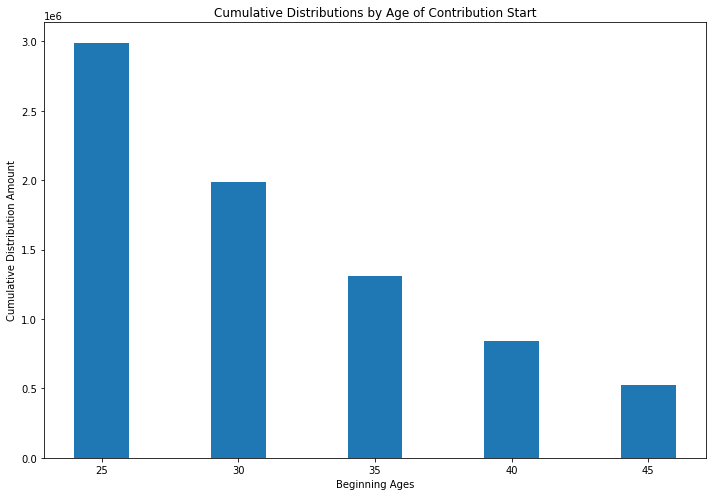

In [67]:
import matplotlib.pyplot as plt

matrix = {age: abs(payout_schedule(age, 5500)['Distribution'].sum()) for age in [25, 30, 35, 40, 45]}

plt.figure(figsize=(10, 7))
plt.bar(x=matrix.keys(), height=matrix.values(), width=2)
plt.xlabel('Beginning Ages')
plt.ylabel('Cumulative Distribution Amount');
plt.title('Cumulative Distributions by Age of Contribution Start')
plt.tight_layout()

In [69]:
list(matrix.values())[0] / list(matrix.values())[-1]

5.660957143849301

Looks like if you began maxing out your IRA at age 25, you would have roughly 5.7 times more retirement money than if you start 45, better start saving, kids!